In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys
sys.path.append("../")
import src.plot as myplot


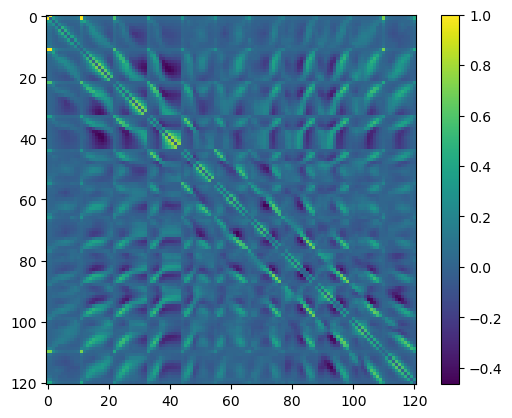

In [2]:
data = np.genfromtxt("../data/INPUT_all/data/train-images-unlabeled-5.dat", delimiter=1, dtype=int)

correlation_matrix = np.corrcoef(data.T)
np.fill_diagonal(correlation_matrix, 0)
plt.imshow(correlation_matrix)
plt.colorbar()

In [3]:
pca = PCA()
pca.fit(correlation_matrix)


eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

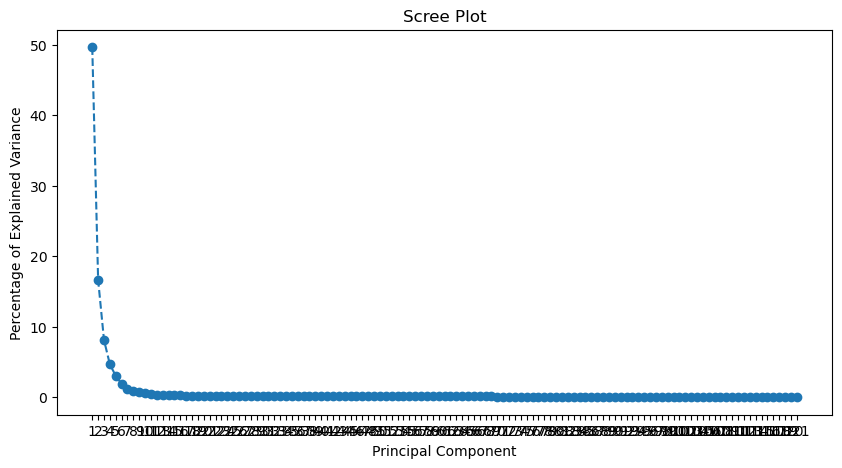

In [4]:

# Assuming 'pca' is your PCA object
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

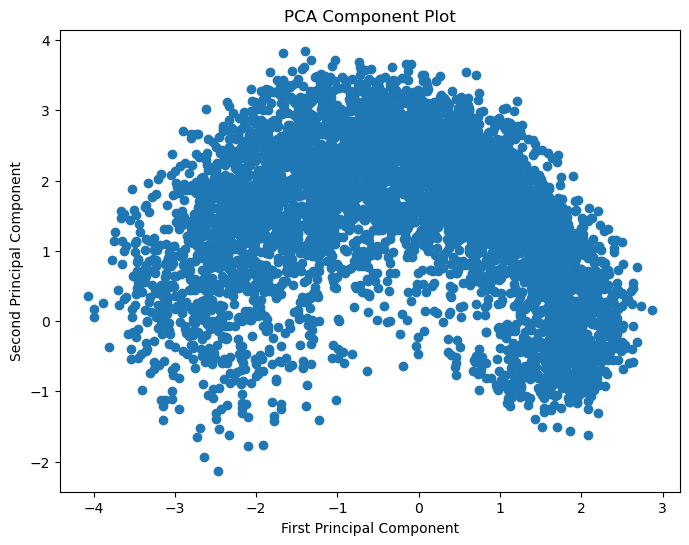

In [5]:
# Assuming 'X' is your original data and 'pca' is already fitted to your data
X_pca = pca.transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Component Plot')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()



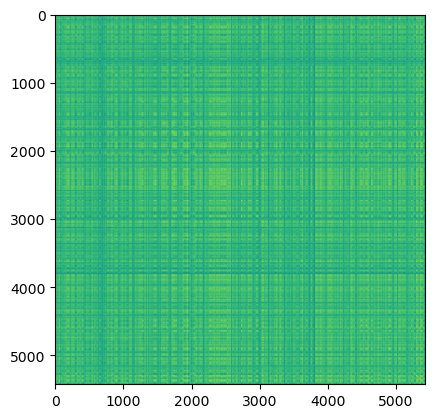

In [6]:
correlation_matrix_proj = np.corrcoef(X_pca[:,:10])
plt.imshow(correlation_matrix_proj)

In [7]:


# Assuming 'pca' is your PCA object fitted to the data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the desired threshold
threshold = 0.90

# Find the number of components needed to reach the threshold
num_components = np.where(cumulative_explained_variance >= threshold)[0][0] + 1

print(f"Number of components to explain {threshold*100}% of variance: {num_components}")

Number of components to explain 90.0% of variance: 20


Eigenvectors for the top eigenvalues:


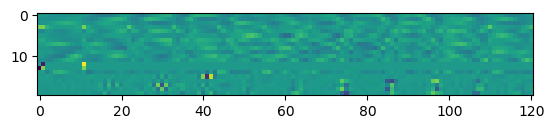

In [8]:
top_eigenvectors = pca.components_[:num_components]


print("Eigenvectors for the top eigenvalues:")
plt.imshow(top_eigenvectors)

In [9]:
def mask_except_k_largest(arr, k, mask_value=0):
    """
    Masks all but the k largest values in a 1D numpy array.
    
    Parameters:
    - arr: Input 1D numpy array.
    - k: Number of largest values to keep.
    - mask_value: Value to replace the masked elements with. Default is 0.
    
    Returns:
    - A numpy array with all but the k largest values masked.
    """
    if k >= arr.size:
        return arr  
    
    kth_largest_value = np.partition(arr, -k)[-k]
    mask = arr < kth_largest_value
    masked_arr = np.copy(arr)  
    masked_arr[mask] = mask_value
    
    return masked_arr



def binary_mask_top_percent(arr, percent):
    k = int(np.ceil(percent * arr.size))
    
    threshold = np.partition(arr, -k)[-k]
    
    mask = arr < threshold
    masked_arr = np.copy(arr)  
    masked_arr[mask] = 0
    return (arr >= threshold).astype(int)


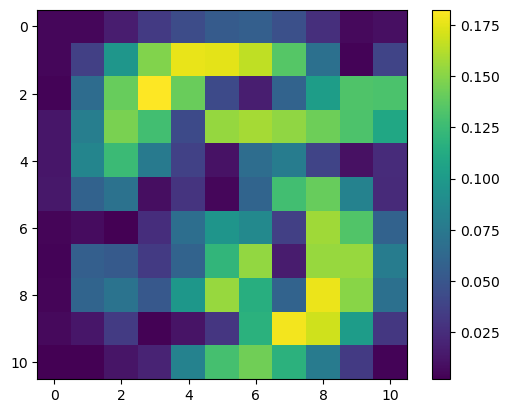

In [10]:
# res = np.abs(top_eigenvectors[0])
# plt.imshow(res.reshape((11,11)))

# res = mask_except_k_largest(np.abs(top_eigenvectors[0]), 5)
# plt.imshow(res.reshape((11,11)))
plt.imshow(np.abs(top_eigenvectors[0]).reshape((11,11)))
plt.colorbar()

In [11]:
# import numpy as np
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt

# # Assuming your data is stored in a numpy array called 'data'
# # data.shape should be (5000, 121)
# # For this example, I will create a random data to simulate
# # data = np.load('path_to_your_data.npy')

# # Simulated data
# np.random.seed(0)
# data = np.random.randint(2, size=(5000, 121))

# # Step 1: Apply PCA to reduce dimensionality (let's reduce to 2D for visualization)
# pca = PCA(n_components=2)
# data_pca = pca.fit_transform(data)

# # Step 2: Determine the optimal number of clusters using silhouette score
# range_n_clusters = range(2, 11)
# silhouette_scores = []

# for n_clusters in range_n_clusters:
#     kmeans = KMeans(n_clusters=n_clusters, random_state=0, init="random")
#     cluster_labels = kmeans.fit_predict(data_pca)
#     silhouette_avg = silhouette_score(data_pca, cluster_labels)
#     silhouette_scores.append(silhouette_avg)

# # Plot silhouette scores to visualize the best number of clusters
# plt.plot(range_n_clusters, silhouette_scores, marker='o')
# plt.title('Silhouette Score for Various Numbers of Clusters')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

# # Step 3: Choose the optimal number of clusters (highest silhouette score)
# optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
# print(f'The optimal number of clusters is: {optimal_n_clusters}')

# # Step 4: Perform K-means clustering with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
# clusters = kmeans.fit_predict(data_pca)

# # Optionally, visualize the clusters
# plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', s=50)
# plt.title('PCA-Reduced Data with K-means Clusters')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.show()


In [12]:
# ev = 1
# pct = 0.05
# v = top_eigenvectors[ev]
# abs_v = np.abs(v)
# top_masked = binary_mask_top_percent(abs_v, pct)


# fig, ax = plt.subplots(1, 2, figsize=(12,4))
# ax[0].set_title(f"Eigenvector {ev}")
# # ax[0].imshow(abs_v.reshape((11,11)))
# myplot.partition_map(ax[0], abs_v.reshape((11,11)))

# ax[1].set_title(f"Threshold largest {pct*100}%")
# ax[1].imshow(top_masked.reshape((11,11)))

In [13]:


# pct = .05


# res = np.apply_along_axis(lambda x : binary_mask_top_percent(np.abs(x), pct),arr=top_eigenvectors, axis=1)


# summed_topperc = np.sum(res.T* pca.explained_variance_ratio_[:num_components]*100, axis = 1).reshape((11,11)) # label based on EV

# summed_topperc = np.sum(res, axis = 0).reshape((11,11)) # label based on EV



In [14]:
# fig, ax = plt.subplots(1, 1, figsize=(6,6))
# ax = [ax]
# ax[0].set_title(f"Select ev for {threshold*100}% explained variance. \nSelect top {pct*100}% largest values in eigenvector. \n Color is % explained variance.")
# # ax[0].imshow(abs_v.reshape((11,11)))
# im = myplot.partition_map(ax[0], summed_topperc, None, myplot.find_borders(summed_topperc), cbar=True, normalise=False, cmap="Reds")

# # ax[1].set_title(f"Threshold largest {pct*100}%")
# # ax[1].imshow(top_masked.reshape((11,11)))